#### Ejercicio 9

1. Definimos $F(x)=Mx-e^x$. Podemos ver que hay al menos un cero de $F(x)$ en el intervalo $[0,1]$ y otro con $x>1$. Para eso usamos que $F(0)=-1$, $F(1)=M-e>0$ y $F(x)<0$ para $x>>0,$ y el teorema que afirma que si $F$ es continua y $F(a)$ y $F(b)$ tienen distinto signo, necesariamente hay un punto $c\in [a,b]$ tal que $F(c)=0$.
2. Para ver que estos ceros de $F(x)$ son únicos observamos que $F^{\prime}(x)=M-e^x$, de forma que la derivada de $F$ tiene un único cero  en el punto $x=log(M)$, que resulta ser un máximo porque la derivada segunda de $F(x)$ es $-e^x$ que en $x=log(M)$ vale $-M$. Podemos ver que para $x<log(M)$ la derivada de $F$ es positiva, y la función $F$ estrictamente creciente, y para $x>log(M)$ la derivada de $F(x)$ es negativa y la función $F(x)$ estrictamente decreciente. En consecuencia, los dos puntos de corte de la gráfica de $F(x)$ con el eje $OX$ son los únicos que hay.
3. También podemos argumentar que si hubiera $3$ o más puntos de corte de  la gráfica de $F(x)$ con el eje $OX$ podríamos concluir, gracias al teorema de Rolle, que $F(x)$ tendría dos o más puntos críticos (i.e. puntos en los que se anula su derivada) y ya sabemos que tiene un único punto crítico. De todas formas, la base del teorema de Rolle y la del criterio de crecimiento/decrecimiento en términos de la derivada es la misma: el teorema del valor intermedio. 
4. Veamos las gráficas de esta situación usando $M=10$:


In [1]:
F(x)= 10*x-exp(x)

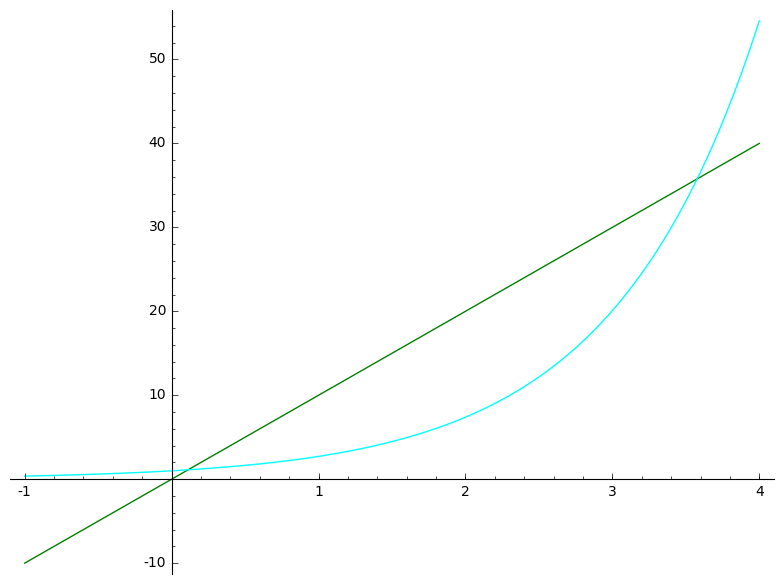

In [2]:
#La grafica verde es 10x y la cyan es la exponencial. 
#Vemos los dos puntos de corte de las gráficas, que 
#corresponden a los puntos donde se anula F(x)
plot(10*x,x,-1,4,color='green')+plot(e^x,x,-1,4,color='cyan')

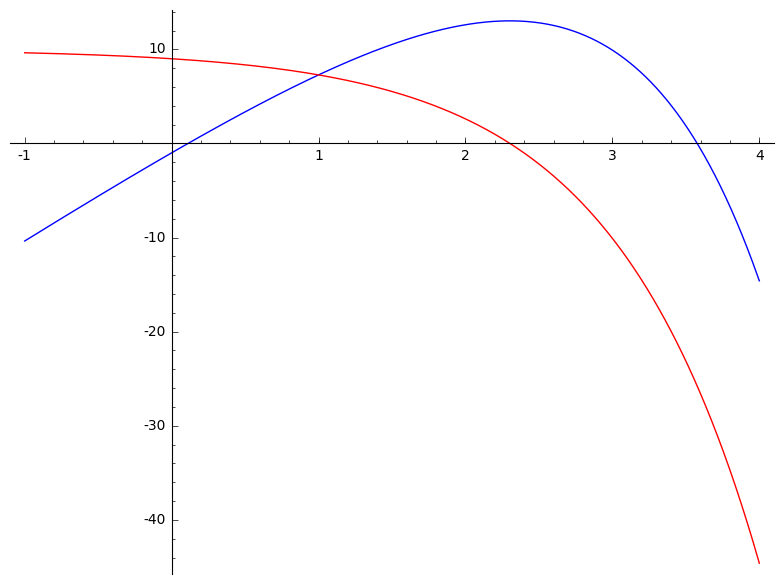

In [3]:
#La gráfica azul es F(x) y la roja es su derivada
plot(F,x,-1,4)+plot(diff(F,x),x,-1,4,color='red')

Para empezar,   $x=log(M)$, el punto en el que se alcanza el valor máximo, es una  aproximación a $w$,  el punto de corte de las dos gráficas  con $x>1$. Claramente, NO es tam buena aproximación, y debe ser mejorada.

Una primera idea puede ser truncar la serie de la exponencial en el término cuadrático:

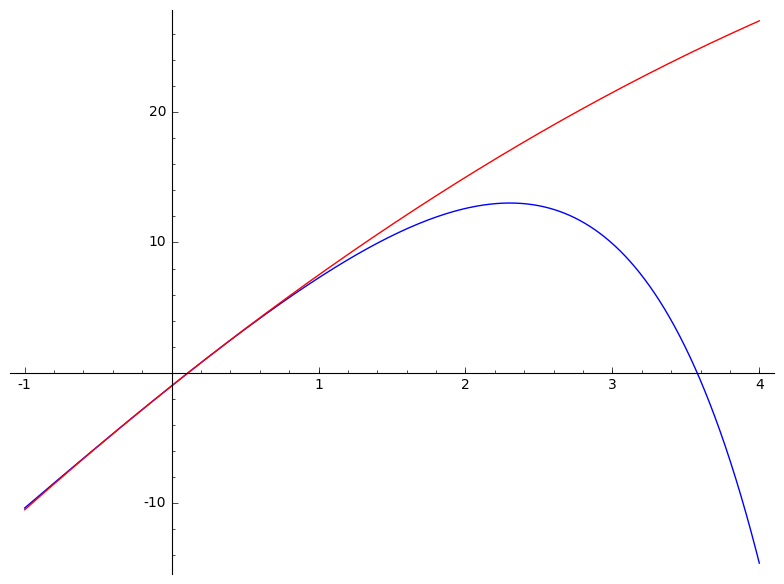

In [4]:
G=10*x-(1+x+(x^2/2))
plot(F,x,-1,4)+plot(G,x,-1,4,color='red')

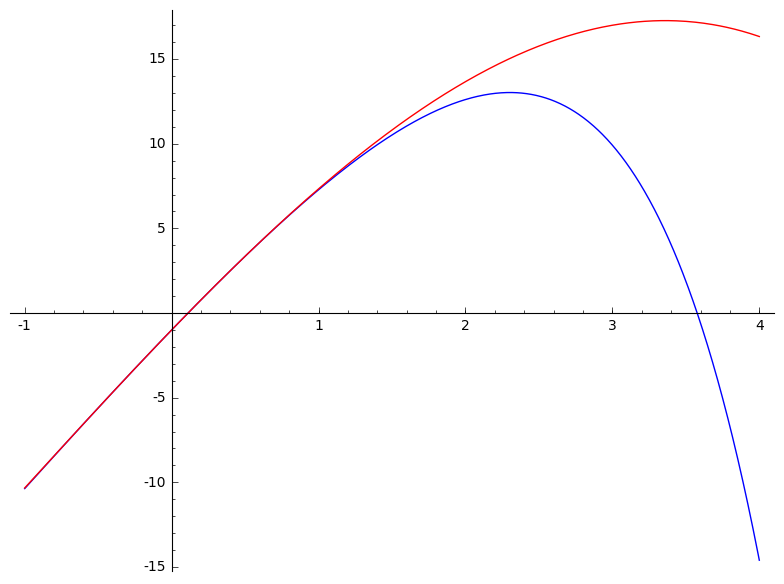

In [5]:
G1=10*x-(1+x+(x^2/2)+(x^3/6))
plot(F,x,-1,4)+plot(G1,x,-1,4,color='red')


Vemos que la aproximación que estamos usando es muy buena cerca del origen, pero tendríamos que añadir muchos términos de la serie de la exponencial para obtener una buena aproximación en el lugar en el que nos interesa, es decir cerca de $w$. Si el primer intento, la función $G$, nos diera una buena aproximación sería fácil obtener una aproximación razonable de $w$, ya que únicamente tendríamos que resolver una ecuación cuadrática. 

En resumen, el problema puede ser que estamos usando el desarrollo de Taylor de la exponencial en el origen, y probablemente deberíamos usar el desarrollo en un punto mucho más cercano a $w$, quizá en $log(M).$

In [6]:
G2 = taylor(F,x,log(10).n(),2)
print G2

x |--> -5.000000000000001*(x - 2.302585092994046)^2 - (1.77635683940025e-15)*x + 13.025850929940464


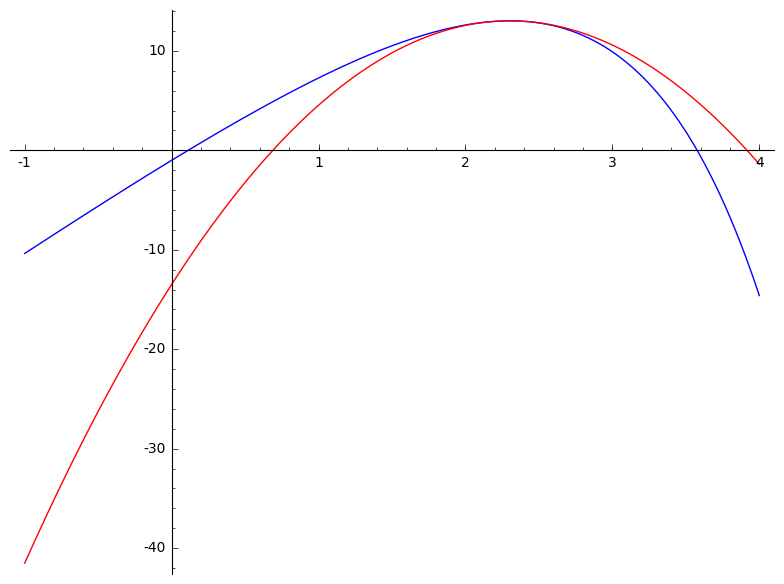

In [7]:
plot(F,x,-1,4)+plot(G2,x,-1,4,color='red')

In [8]:
#Punto de corte, mayor que 1, de G2 con el eje OX. 
#Como G2=0 es una ecuación cuadrática es fácil de resolver
solve(G2,x)[1].rhs().n()

3.91663905305489

In [9]:
log(10).n()

2.30258509299405

Vemos que la aproximación es bastante mejor que log(10), pero se pasa un poco. Tomando desarrollos de Taylor con más términos obtenemos mejores aproximaciones, pero la ecuación polinomial que hay que resolver es de grado mayor, y, por tanto más difícil. El polinomio de Taylor de grado $1$ es una recta horizontal y no nos sirve. El de grado $2$ es la curva verde, que corresponde a la roja en la gráfica anterior. Cuantos más términos utilizamos obtenemos mejores aproximaciones. 

En cualquier caso, este argumento se basa en que el polinomio de Taylor calculado en el m'aximo tiene una forma, de parábola, muy parecida a la forma de la función. 

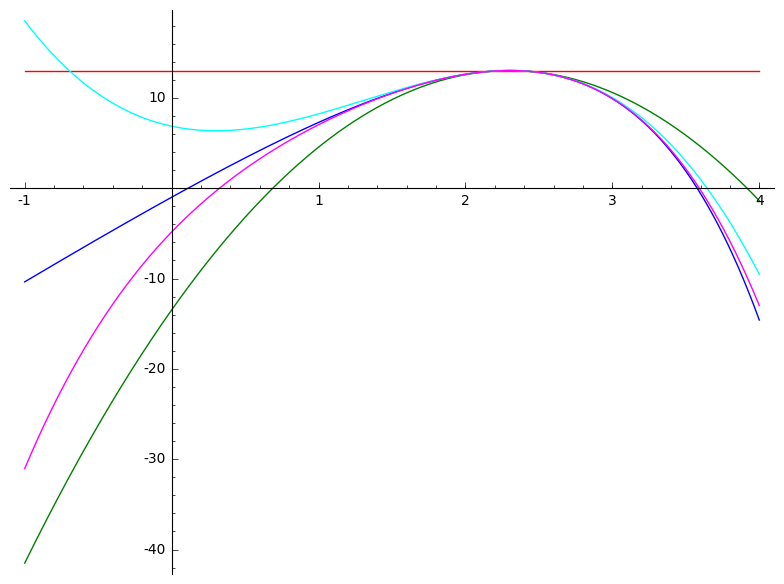

In [10]:
plot(F,x,-1,4)+plot(taylor(F,x,log(10).n(),1),x,-1,4,color='red')+\
plot(taylor(F,x,log(10).n(),2),x,-1,4,color='green')+\
plot(taylor(F,x,log(10).n(),3),x,-1,4,color='cyan')+\
plot(taylor(F,x,log(10).n(),4),x,-1,4,color='magenta')

Otra idea puede ser utilizar el método de Newton (que veremos más adelante en el Cap. 7) . Como $F^{\prime}(x)=M-e^x$, la función que tenemos que iterar es, de acuerdo a la definición del método,

In [11]:
M = 10
H0 = diff(F,x)
H(x) = x-(F/H0)
print H(x=log(M).n()+0.1)

14.7388297379746


In [12]:
x = log(M).n()+0.1
for muda in srange(20):
    x = H(x)
    print x

14.7388297379746
13.7388843086139
12.7390218439964
11.7393663190394
10.7402227084204
9.74233251912689
8.74747107710801
7.75979849232131
6.78875542101651
5.85470100254840
4.99796221755786
4.28743671656951
3.81108338327033
3.60970067002809
3.57787046934032
3.57715242195606
3.57715206395739
3.57715206395730
3.57715206395730
3.57715206395730


Vemos que a partir de la iteración número $15$ ya no hay mejora en la aproximación, y debemos aceptar que $3.57$ es una buena aproximación al valor de $w$. El siguiente paso puede ser escribir la primera aproximación que hemos obtenido para $w$ en términos de $M$.

In [13]:
var('M')
FF(x)= M*x-exp(x)
GG = taylor(FF,x,log(M),2)
show(GG)

x |--> -1/2*M*(x - log(M))^2 + M*(log(M) - 1)

In [14]:
solve(GG,x)

[x == -sqrt(2*log(M) - 2) + log(M), x == sqrt(2*log(M) - 2) + log(M)]

La solución que nos interesa es la segunda $w=\sqrt(2log(M)-2)+log(M)$, y en ella ya vemos una posible cota para $M$, quizá no muy buena, $log(M)>1$, es decir $M>e$. Veamos mediante gráficas lo que pasa. 

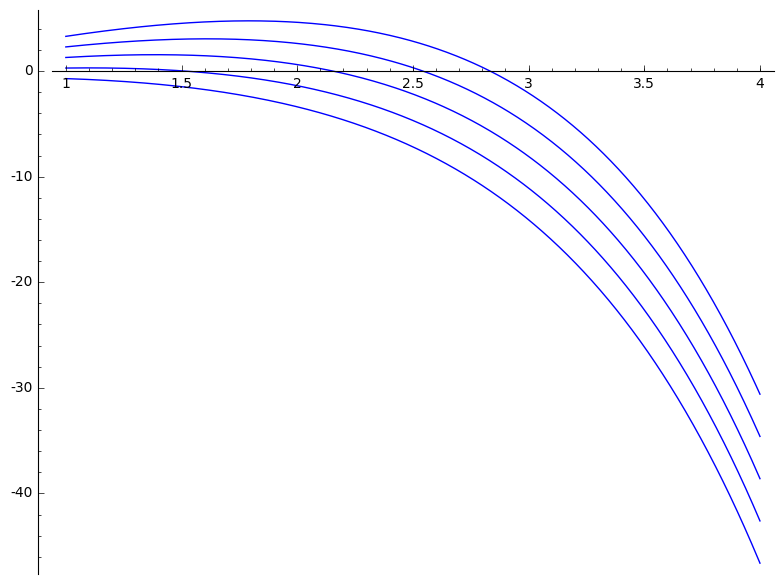

In [15]:
sum([plot(FF(M=j),x,1,4) for j in srange(2,7)])

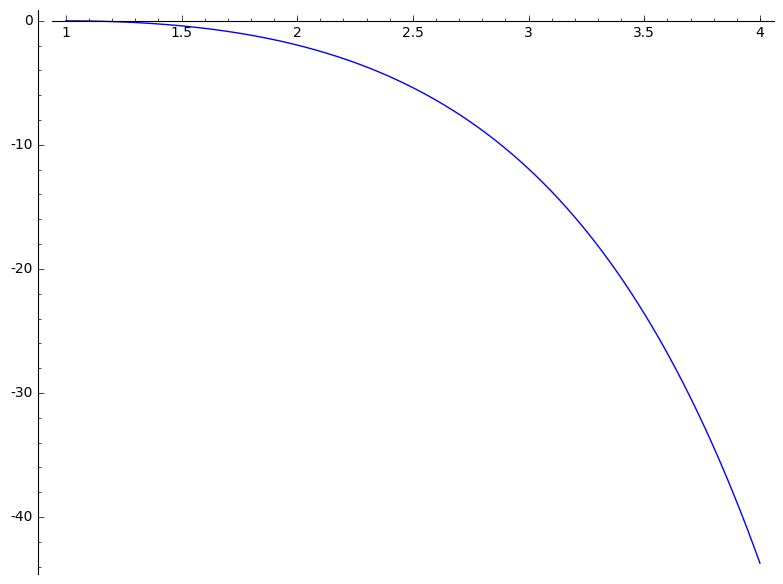

In [16]:
M0=N(e)
plot(FF(M=M0),x,1,4)

Parece que hay una respuesta bien precisa. La cota inferior para $M$ podría bien ser igual al número $e$ ¿Por qué?

#### Ejercicio 11


verbose 0 (3748: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3748: plot.py, generate_plot_points) Last error message: 'negative number cannot be raised to a fractional power'


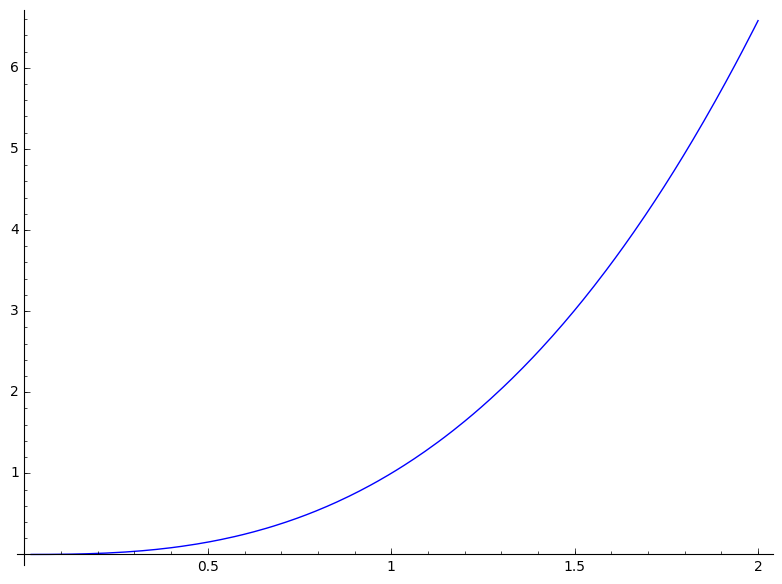

In [17]:
plot(x^e,x,-2,2)

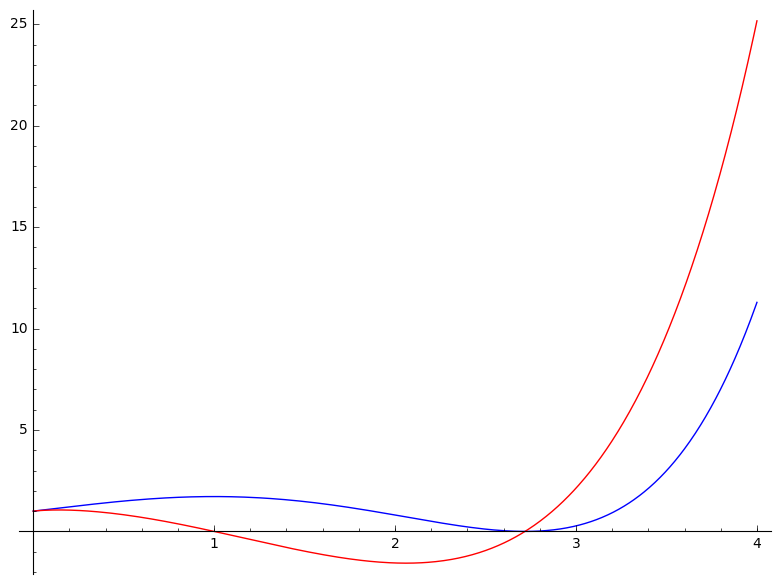

In [18]:
plot(e^x-x^e,x,0,4)+plot(diff(e^x-x^e,x),x,0,4,color='red')

In [19]:
diff(e^x-x^e,x)

-x^(e - 1)*e + e^x

In [20]:
g = diff(diff(e^x-x^e,x),x);print g

-x^(e - 2)*(e - 1)*e + e^x


In [21]:
g(x=1).n()

-1.95249244201256

In [22]:
g(x=e).n()

5.57494152476088

Vemos que la función que estamos estudiando, $f(x)=e^x-x^e$ (la gráfica azul), tiene un máximo en $x=1$ y un mínimo en $x=e$ donde vale cero. Entonces es positiva para $x>e$, y en particular para $x=\pi$.

#### Ejercicio 10

In [23]:
var('x y a')
f(x)=(a+sin(x))*exp(x)
print diff(f,x)

x |--> (a + sin(x))*e^x + cos(x)*e^x


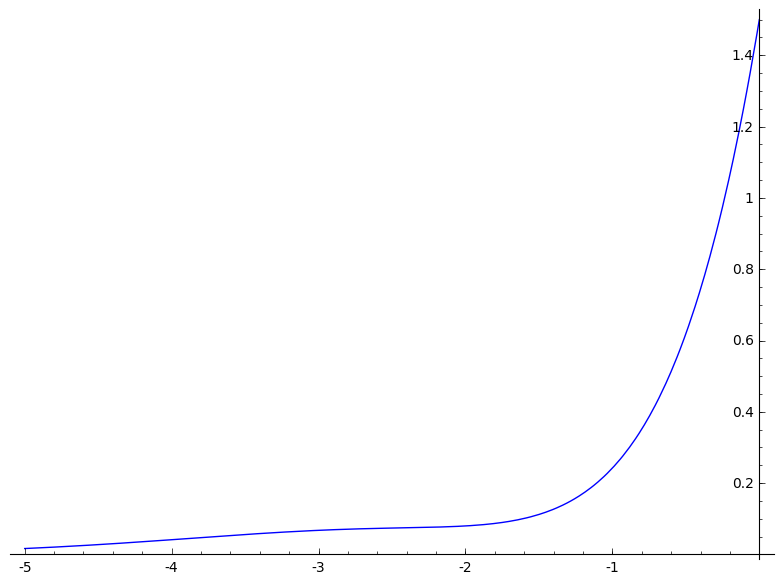

In [24]:
plot(f(a=1.5),x,-5,0)

x |--> (a + sin(x))*e^x + cos(x)*e^x


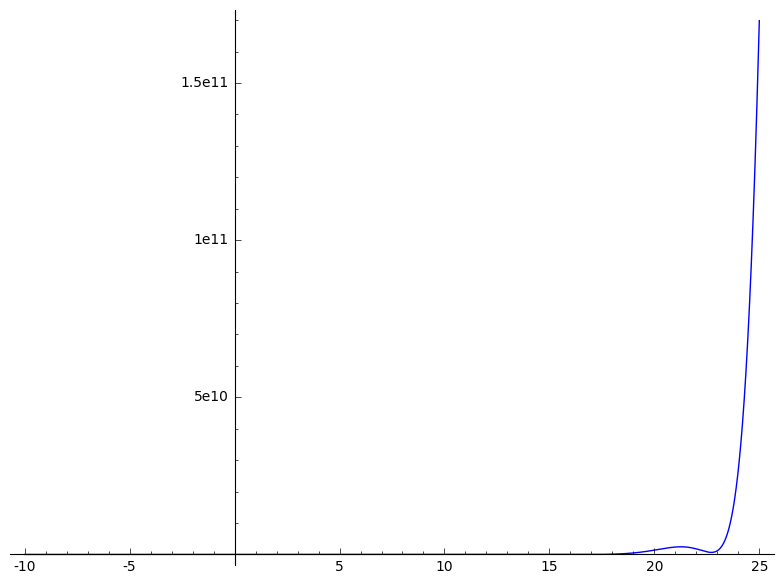

In [25]:
g = diff(f,x)
print g
plot(g(a=1.5),x,-10,25)

Podemos eliminar, en $g(x)$,  la exponencial, ya que siempre es positiva. 

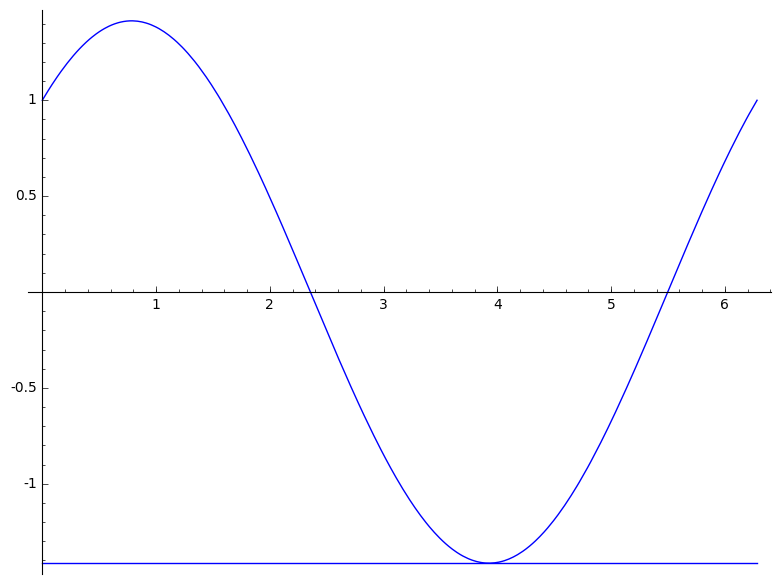

In [26]:
h(x)=cos(x)+sin(x)
plot(h,x,0,2*pi)+plot(-sqrt(2),x,0,2*pi)

In [27]:
h1 = diff(h,x)
solve(h1,x)

[sin(x) == cos(x)]

El valor mínimo se obtiene en $5\pi/4$ y vale $-\sqrt{2}$. Entonces el $a$ que piden es $\sqrt{2}$, ya que con ese $a$ se garantiza que la derivada es positiva y es el menor real con esa propiedad. 